In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

plt.set_cmap("gray")


<Figure size 432x288 with 0 Axes>

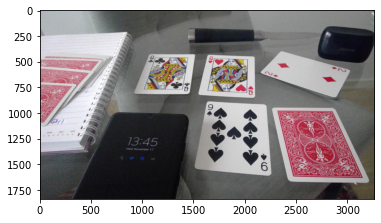

In [2]:
img = cv.imread("./img/objects.jpg")
plt.imshow(img[:, :, ::-1])


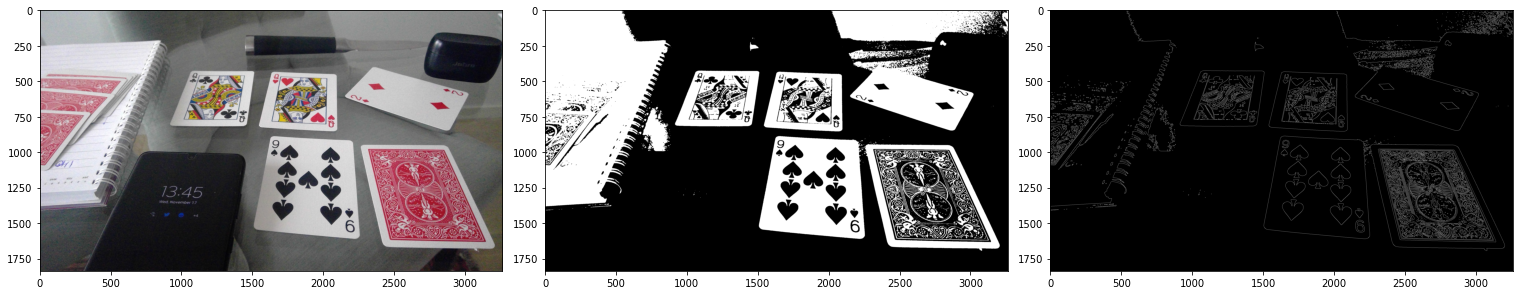

In [3]:
fig, ax = plt.subplots(1, 3)
fig.set_constrained_layout(True)
fig.set_size_inches((7 * 3, 7))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (15, 15), 1)
ret, thresh = cv.threshold(blur, 130, 255, 0)
canny = cv.Canny(thresh, 0, 255)

ax[0].imshow(img[:, :, ::-1])
ax[1].imshow(thresh)
ax[2].imshow(canny)


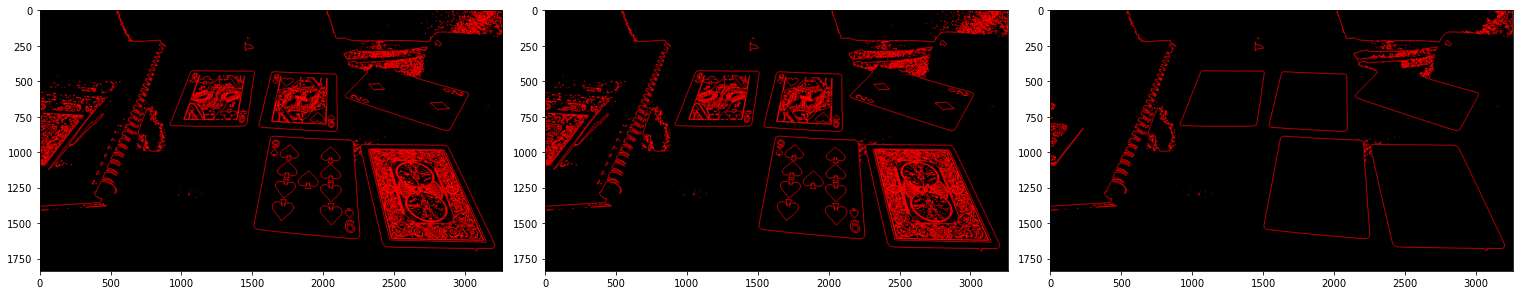

In [4]:
# using thresh
fig, ax = plt.subplots(1, 3)
fig.set_constrained_layout(True)
fig.set_size_inches((7 * 3, 7))


contours, h = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
out1 = cv.drawContours(np.zeros_like(img), contours, -1, (0, 0, 255), 3)


contours, h = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
out2 = cv.drawContours(np.zeros_like(img), contours, -1, (0, 0, 255), 3)
# print(contours[0])

contours, h = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
out3 = cv.drawContours(np.zeros_like(img), contours, -1, (0, 0, 255), 3)

ax[0].imshow(out1[:, :, ::-1])
ax[1].imshow(out2[:, :, ::-1])
ax[2].imshow(out3[:, :, ::-1])


In [5]:
contours, h = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

[cv.contourArea(c) for c in contours], len(sorted(contours, key=cv.contourArea))
contours = sorted(contours, key=cv.contourArea)

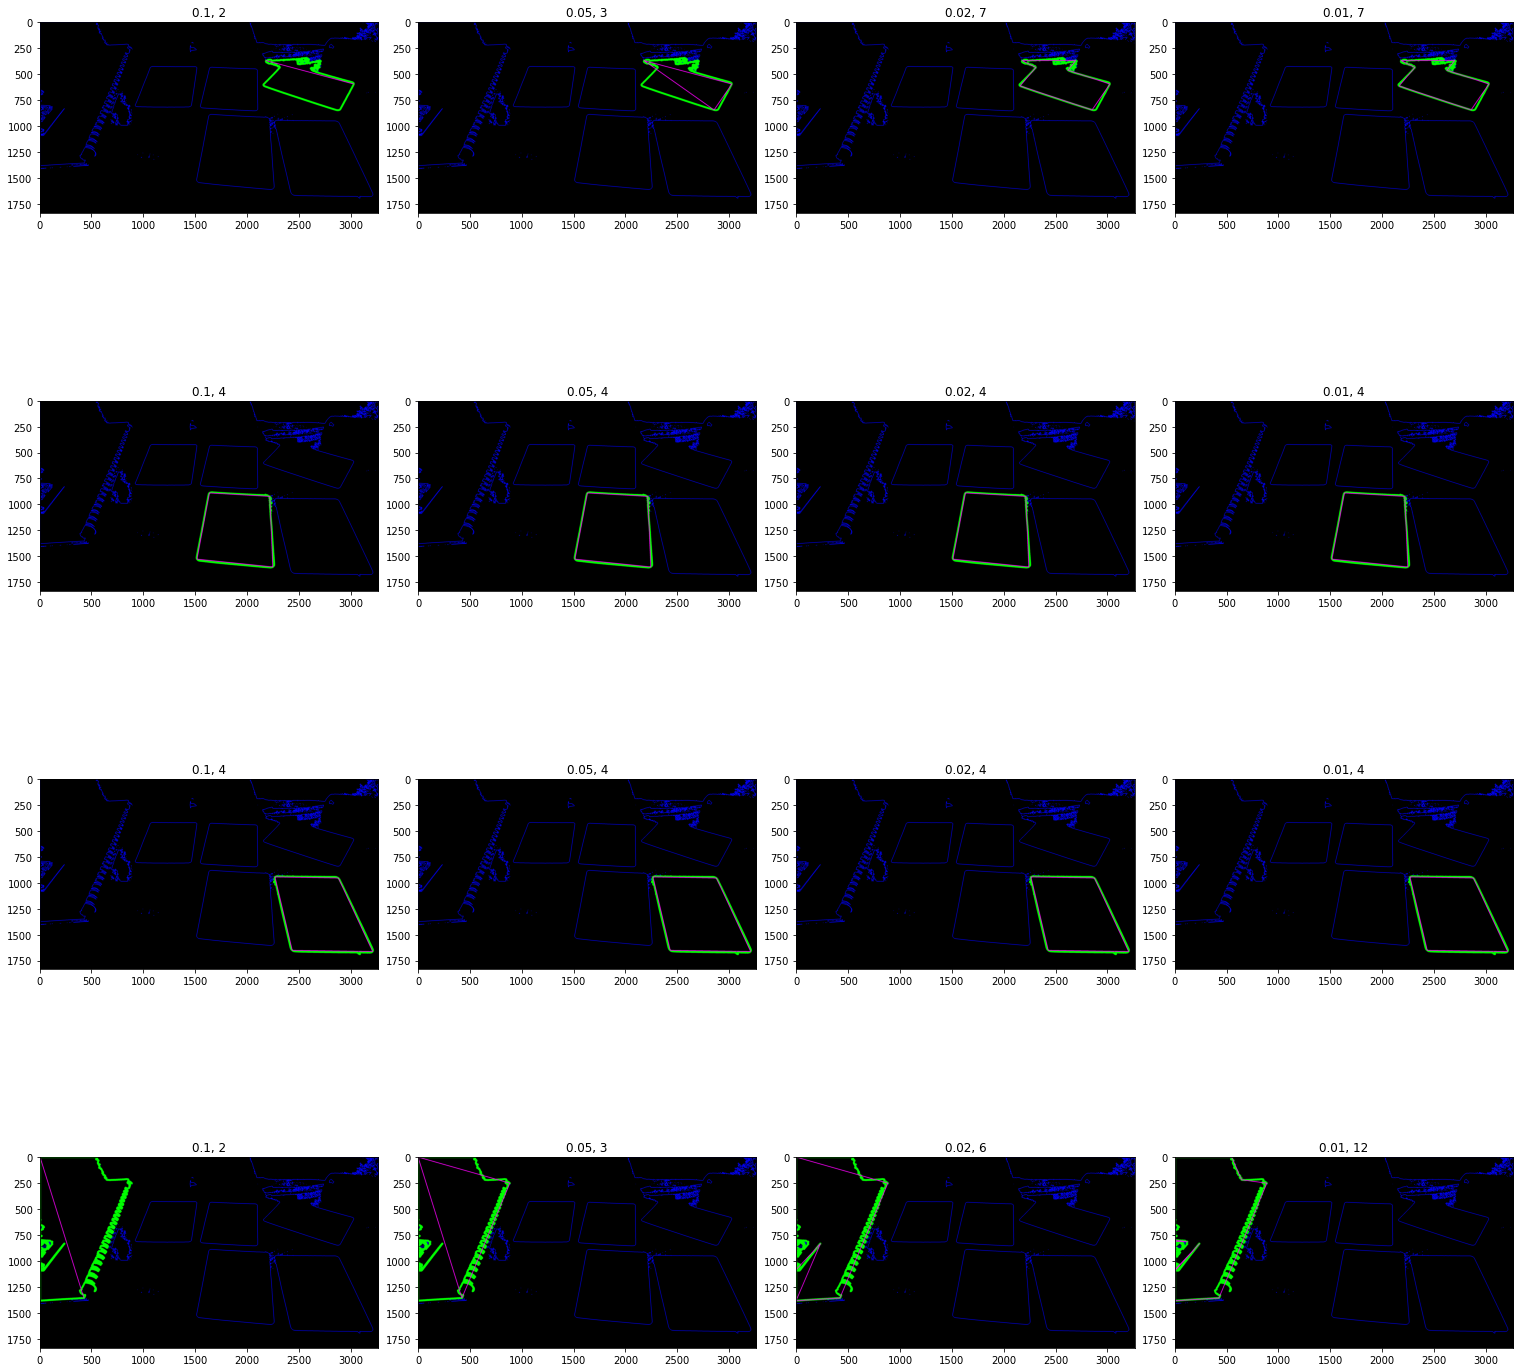

In [6]:

fig, ax = plt.subplots(4, 4)
fig.set_constrained_layout('tight')
fig.set_size_inches((21 , 21))

black = np.zeros(img.shape)

_ = cv.drawContours(black, contours, -1, (0, 0, 1), 3)

for ix, cntr in enumerate(contours[-4:]):
    black_img = black.copy()
    peri = cv.arcLength(cntr, True)
    _ = cv.drawContours(black_img, cntr, -1, (0, 1, 0), 18)
    for iy, epsilon in enumerate([0.1, 0.05, 0.02, 0.01]):
        approx = cv.approxPolyDP(cntr, epsilon * peri, True)
        i = cv.drawContours(black_img.copy(), [approx], -1, (1, 0, 1), 6)

        ax[ix, iy].imshow(i)
        ax[ix, iy].set_title(f"{epsilon}, {len(approx)}")



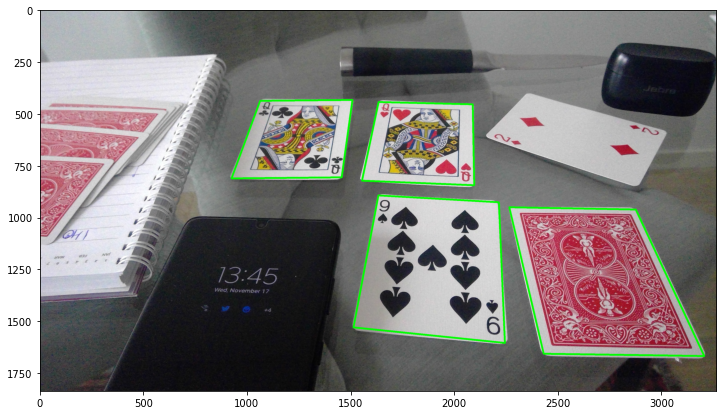

In [46]:
contours, h = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv.contourArea, reverse=True)
def approx(cntr, epsilon=0.1):
    peri = cv.arcLength(cntr, True)
    return cv.approxPolyDP(cntr, epsilon * peri, True)

approx_contours = [approx(c) for c in contours[:16]]
approx_contours = sorted(approx_contours, key=len, reverse=True)

# print(approx_contours)

img_contors = img.copy()
fig, ax = plt.subplots()
fig.set_size_inches(21,7)

for cntr in approx_contours:
    if len(cntr) < 4: break
    cv.drawContours(img_contors, [cntr], -1, (0,255,0), 8)

ax.imshow(img_contors[:,:,::-1])
    